# Задания
1. Реализовать решение задач классификации и регрессии пользовательских и/или модельных данных с использованием бэггинга над деревьями решений и случайного леса.
2. Реализовать решение задач классификации и регрессии пользовательских и/или модельных данных с использованием градиентного бустинга, алгоритмов AdaBoost, XGBoost, CatBoost и LightGBM.
3. Реализовать решение задач классификации и/или регрессии пользовательских и/или модельных данных с использованием стекинга.
4. Реализовать решение задач классификации и/или регрессии пользовательских и/или модельных данных с использованием многоуровнего стекинга.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Классификация. Предсказать успеваемость студентов
Набор данных состоит из 480 записей учащихся и 16 характеристик
- Ссылка на данные - https://clck.ru/36wxxV

#### Загрузка

In [4]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


In [7]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Небольшой обзор данных

In [43]:
def plot_category(feature, df, figsize=None):
    low = df[df['Class']=='L'].groupby([feature]).size()
    medium = df[df['Class']=='M'].groupby([feature]).size()
    high = df[df['Class']=='H'].groupby([feature]).size()
    labels = low.index

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    if figsize:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = plt.subplots()
    
    rects1 = ax.bar(x - width, round(low * 100 / df.groupby([feature]).size(), 2), width, label='L')
    rects2 = ax.bar(x, round(medium * 100 / df.groupby([feature]).size(), 2), width, label='M')
    rects3 = ax.bar(x + width, round(high * 100 / df.groupby([feature]).size(), 2), width, label='H')

    ax.set_ylabel('Percentage')
    ax.set_title('Distribution of Classes based on %s' % feature)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=80)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)
    

    fig.tight_layout()
    plt.show()

In [9]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

#### Распределение по полу

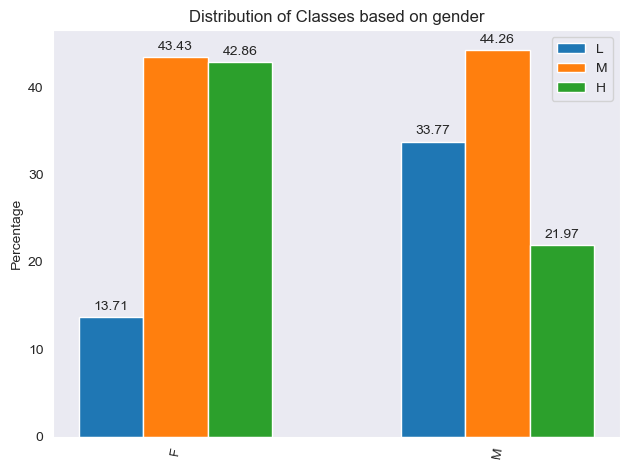

In [44]:
for feature in ['gender']:
    plot_category(feature, df)

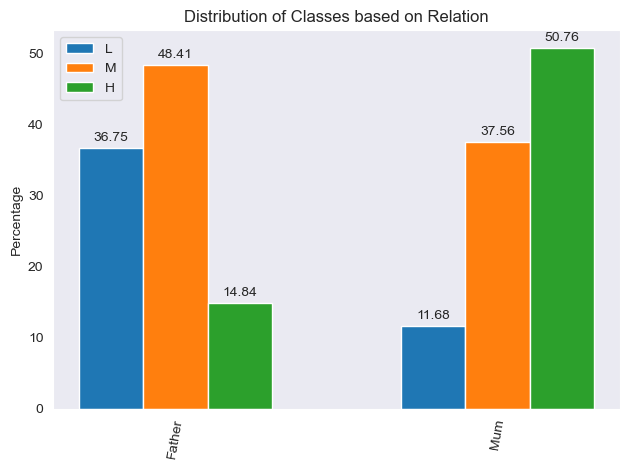

In [45]:
for feature in ['Relation']:
    plot_category(feature, df)

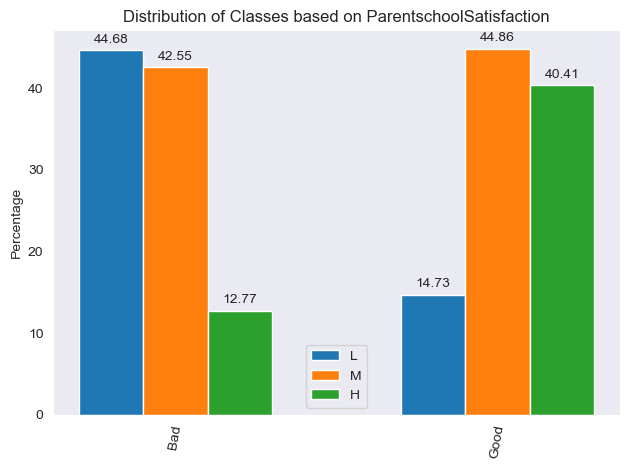

In [46]:
for feature in ['ParentschoolSatisfaction']:
    plot_category(feature, df)

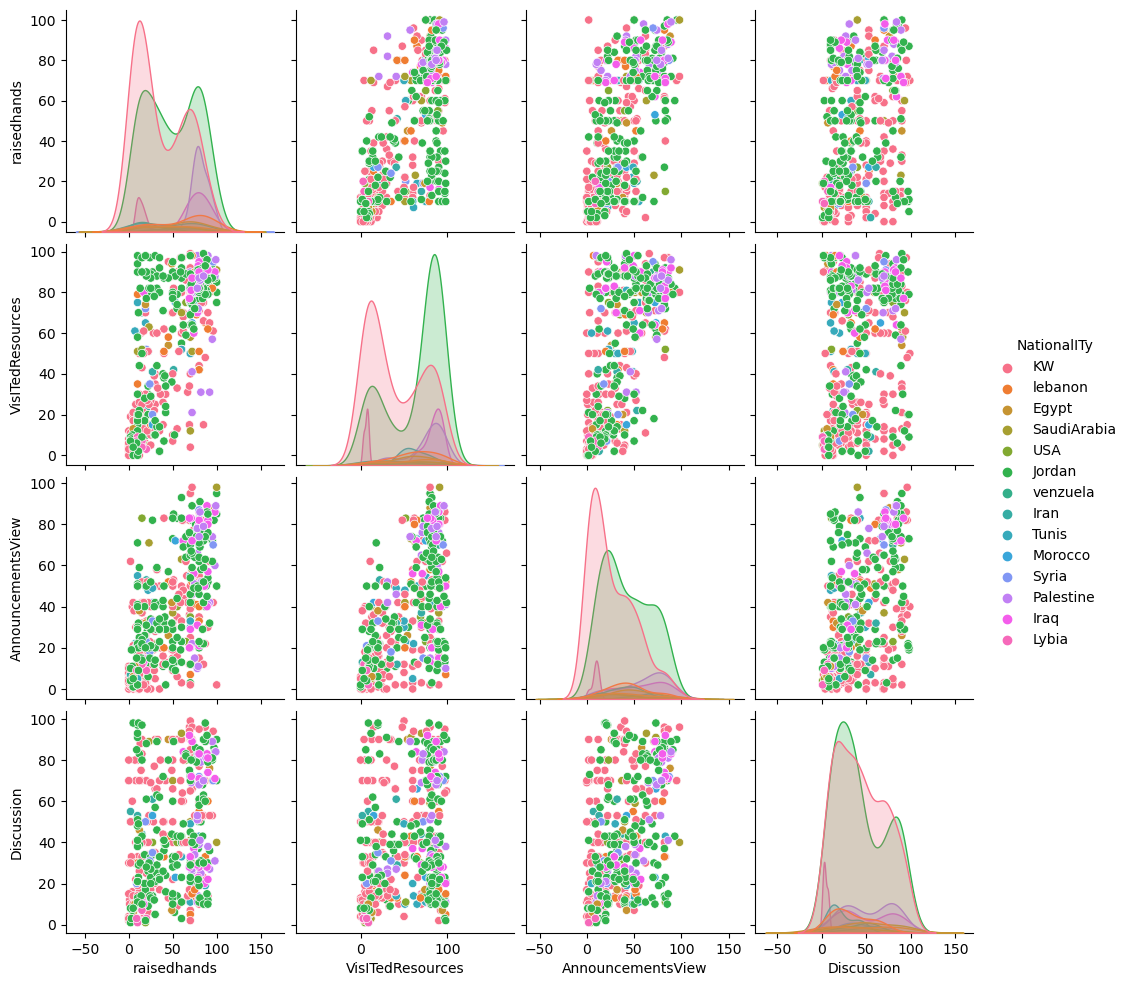

In [11]:
df_small = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'NationalITy']]
sns.pairplot(df_small, hue='NationalITy')

#### Обработка для удобства 


In [5]:
from sklearn.preprocessing import LabelEncoder
Features = df.drop('Class',axis=1)
Target = df['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

#### Построение моделей

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
# №0. LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)
log_pred = Logit_Model.predict(X_test)
accur = accuracy_score(y_test,log_pred)

C:\Users\ktota\anaconda3\anacondas\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# №1. Decision Tree + Bagging
DecTree = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(DecTree,random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

In [14]:
# №2. SVM (Для сравнения)
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)

In [15]:
# №3. RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RF_preds = rf.predict(X_test)

In [153]:
# №4. Бустинги (Без подбора гиперпараметров)
#CatBoost
Cat = CatBoostClassifier(verbose = False)
Cat.fit(X_train, y_train)
cat_preds = Cat.predict(X_test)

In [84]:
# Обычный градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)
gr_preds = gr.predict(X_test)

In [17]:
# LGBM
LGBM = LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=4, min_child_weight = 0.01, learning_rate=0.01, verbose = -1)
LGBM.fit(X_train, y_train)
LGBM_preds = LGBM.predict(X_test)

In [20]:
# XGBOOST
import xgboost as xgb
encoder = LabelEncoder()
new_y_train = encoder.fit_transform(y_train)
new_y_test = encoder.fit_transform(y_test)
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, new_y_train).predict(X_test)
from sklearn.metrics import accuracy_score

In [77]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=150, learning_rate=0.3, random_state=42)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

In [222]:
# №5. Стекинг
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
m1 = RandomForestClassifier()
m2 = SVC(kernel='linear')
estimators = [('RandomForest', m1), ('svm', m2)]
ensemble = VotingClassifier(estimators)
ensemble_model = ensemble.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

In [79]:
ensemble

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000001B0AEB7D6D0>),
                             ('random_forest', RandomForestClassifier()),
                             ('logistic_regression', LogisticRegression()),
                             ('k_neighbors', KNeighborsClassifier())])

In [ ]:
# №6. Многоуровневый стекинг (С логистической регрессией на выходе)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf' , RandomForestClassifier(n_estimators=10 , random_state=42)),
    ('lgbm' ,LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=6, verbose = -1)),
    ('adaboost', AdaBoostClassifier(n_estimators=300))
]
clf = StackingClassifier(
    estimators = estimators , 
    final_estimator = LogisticRegression() , 
    cv = 10
)
clf.fit(X_train , y_train)
stacking_pred = clf.predict(X_test)

In [154]:
print(f'LogisticRegression: {accuracy_score(y_test, log_pred)}')
print(f'Decision Tree + Bagging: {accuracy_score(y_test, bagging_pred)}')
print(f'SVM (Для сравнения): {accuracy_score(y_test, svc_preds)}')
print(f'RandomForest: {accuracy_score(y_test, RF_preds)}')
print(f'LGBM: {accuracy_score(y_test, LGBM_preds)}')
print(f'XGBOOST: {accuracy_score(new_y_test, xgb_pred)}')
print(f'CatBoost: {accuracy_score(y_test, cat_preds)}')
print(f'AdaBoost:{accuracy_score(y_test, ada_preds)}')
print(f'Ensemble:{accuracy_score(y_test, ensemble_pred)}')
print(f'Stacking : {accuracy_score(y_test, stacking_pred)}')
print(f'Gradient Boosting:{accuracy_score(y_test, gr_preds)}')

LogisticRegression: 0.7604166666666666
Decision Tree + Bagging: 0.7708333333333334
SVM (Для сравнения): 0.3333333333333333
RandomForest: 0.8854166666666666
LGBM: 0.84375
XGBOOST: 0.8541666666666666
CatBoost: 0.84375
AdaBoost:0.75
Ensemble:0.8541666666666666
Stacking : 0.8229166666666666
Gradient Boosting:0.8020833333333334


In [58]:
#Схема стекинга
clf

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('lgbm',
                                LGBMClassifier(max_depth=12, n_estimators=300,
                                               num_leaves=6, verbose=-1)),
                               ('adaboost',
                                AdaBoostClassifier(n_estimators=300))],
                   final_estimator=LogisticRegression())

### Посмотрим, как это выглядит визуально:

In [223]:
log = pd.Series(accuracy_score(y_test, log_pred))
dec = pd.Series(accuracy_score(y_test, bagging_pred))
sv = pd.Series(accuracy_score(y_test, svc_preds))
rf = pd.Series(accuracy_score(y_test, RF_preds))
lg = pd.Series(accuracy_score(y_test, LGBM_preds))
xg = pd.Series(accuracy_score(new_y_test, xgb_pred))
cb = pd.Series(accuracy_score(y_test, cat_preds))
ens = pd.Series(accuracy_score(y_test, ensemble_pred))
stck = pd.Series(accuracy_score(y_test, stacking_pred))
ada = pd.Series(accuracy_score(y_test, ada_preds))

In [224]:
scores = pd.DataFrame()
scores['Logistic regression'] = log
scores['Bagging'] = dec
scores['SVM'] = sv
scores['RandomForest'] = rf
scores['LGBM'] = lg
scores['XGBOOST'] = xg
scores['CatBoost'] = cb
scores['Stacking'] = ens
scores['StackingLogReg'] = stck
scores['AdaBoost'] = ada

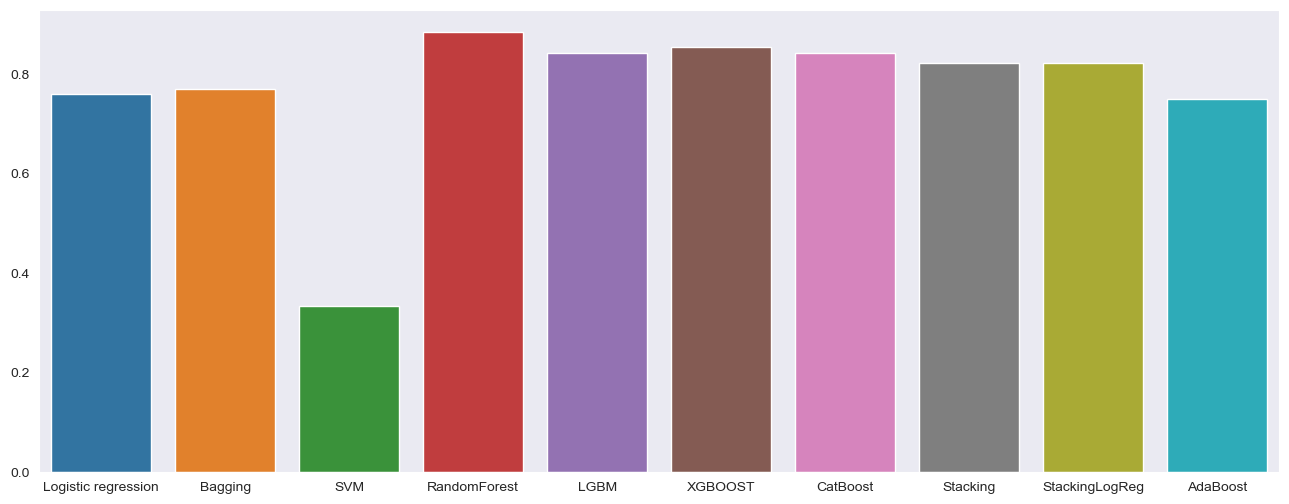

In [225]:
plt.figure(figsize = (16,6))
sns.barplot(scores)
sns.set_style("whitegrid")

### Визуализируем, как наши модели предсказывают классы

In [162]:
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Logistic regression'),
  Text(1, 0, 'DecisionTree'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'LGBM'),
  Text(5, 0, 'XGBOOST'),
  Text(6, 0, 'CatBoost'),
  Text(7, 0, 'Ensemble'),
  Text(8, 0, 'StackingLogReg'),
  Text(9, 0, 'AdaBoost')])

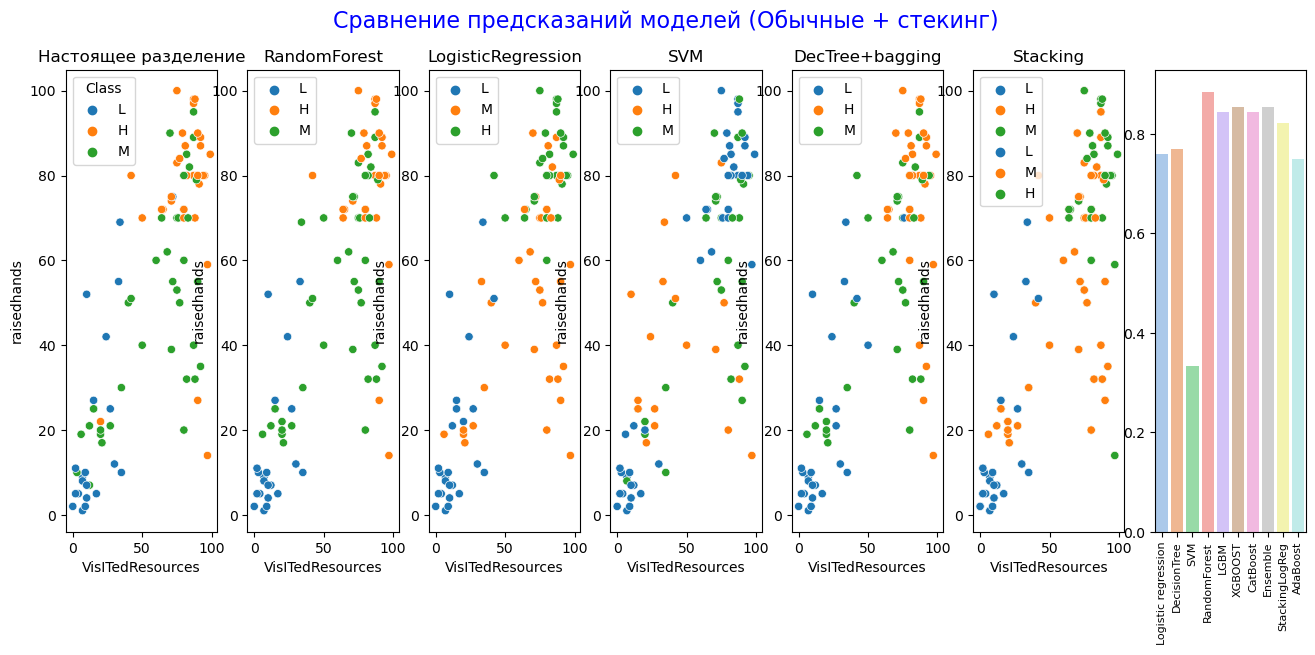

In [163]:
fig, axes = plt.subplots(ncols=7, nrows = 1, figsize = (16,6))
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = y_test, ax = axes[0])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = RF_preds, ax = axes[1])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = log_pred, ax = axes[2])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = svc_preds, ax = axes[3])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = bagging_pred, ax = axes[4])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = ensemble_pred, ax = axes[5])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = stacking_pred, ax = axes[5])
sns.set_style("dark")

axes[0].set_title('Настоящее разделение')
axes[1].set_title('RandomForest')
axes[2].set_title('LogisticRegression')
axes[3].set_title('SVM')
axes[4].set_title('DecTree+bagging')
axes[5].set_title('Stacking')

fig.suptitle('Сравнение предсказаний моделей (Обычные + стекинг)', color = 'blue', fontsize=16)
sns.barplot(scores, ax=axes[6], palette = 'pastel')
plt.xticks(fontsize=8, rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Logistic regression'),
  Text(1, 0, 'Bagging'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'LGBM'),
  Text(5, 0, 'XGBOOST'),
  Text(6, 0, 'CatBoost'),
  Text(7, 0, 'Stacking'),
  Text(8, 0, 'StackingLogReg'),
  Text(9, 0, 'AdaBoost')])

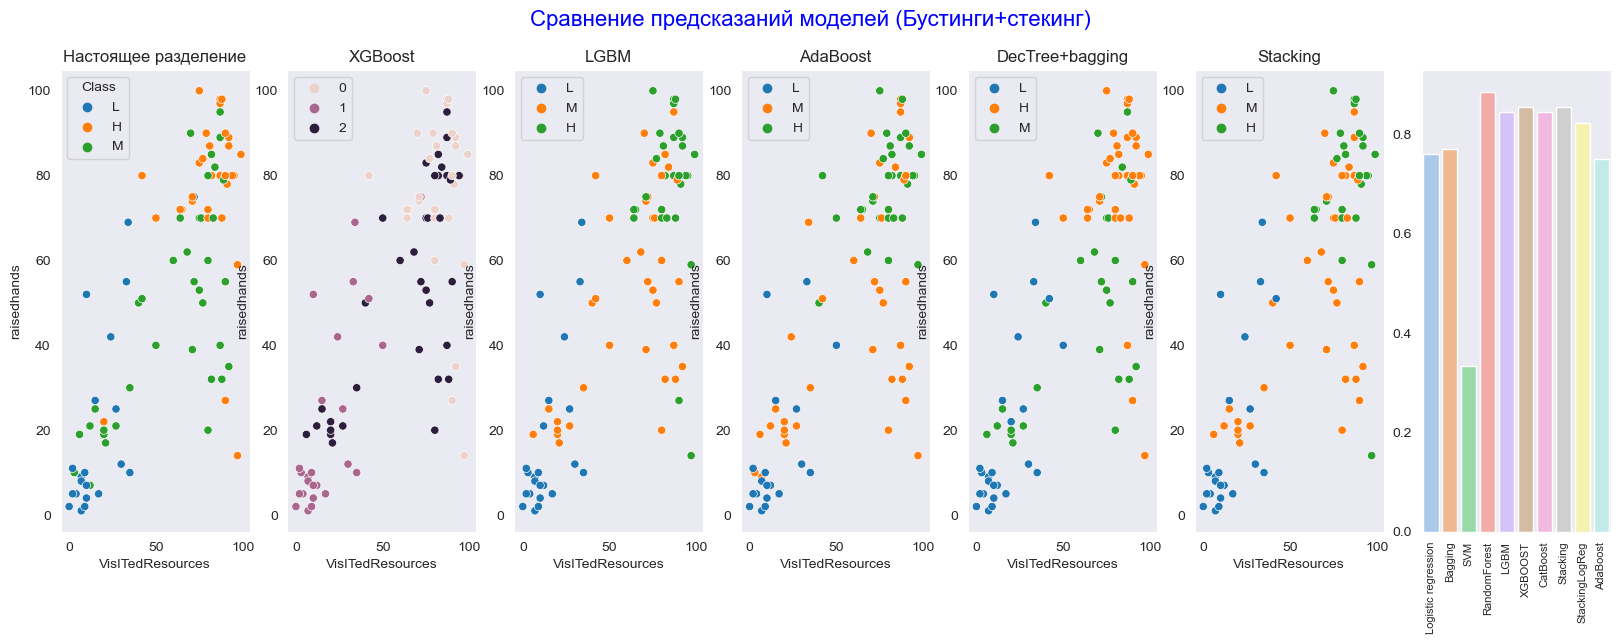

In [197]:
fig, axes = plt.subplots(ncols=7, nrows = 1, figsize = (20,6))
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = y_test, ax = axes[0])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = xgb_pred, ax = axes[1])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = LGBM_preds, ax = axes[2])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = ada_preds, ax = axes[3])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = ensemble_pred, ax = axes[4])
sns.scatterplot(data = X_test, x = 'VisITedResources', y = 'raisedhands', hue = stacking_pred, ax = axes[5])
sns.set_style("dark")

axes[0].set_title('Настоящее разделение')
axes[1].set_title('XGBoost')
axes[2].set_title('LGBM')
axes[3].set_title('AdaBoost')
axes[4].set_title('DecTree+bagging')
axes[5].set_title('Stacking')

fig.suptitle('Сравнение предсказаний моделей (Бустинги+стекинг)', color = 'blue', fontsize=16)
sns.barplot(scores, ax=axes[6], palette = 'pastel')
plt.xticks(fontsize=8, rotation=90)


### Сравнение бустингов

In [174]:
columns_to_plot = ['LGBM', 'XGBOOST', 'CatBoost', 'AdaBoost']

In [181]:
from adjustText import adjust_text

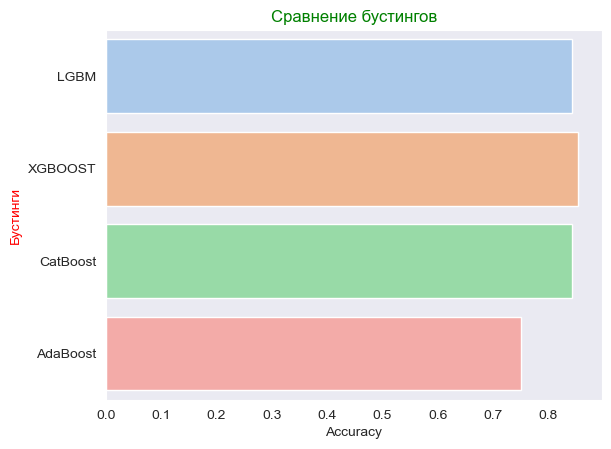

In [196]:
sns.barplot(scores[['LGBM', 'XGBOOST', 'CatBoost', 'AdaBoost']], orient='h', palette='pastel')
sns.set_style("dark")
plt.xlabel('Accuracy')
plt.ylabel('Бустинги', color = 'red')
plt.title('Сравнение бустингов', color = 'green')
plt.show()

In [184]:
print(f'LGBM: {accuracy_score(y_test, LGBM_preds)}')
print(f'XGBOOST: {accuracy_score(new_y_test, xgb_pred)}')
print(f'CatBoost: {accuracy_score(y_test, cat_preds)}')
print(f'AdaBoost:{accuracy_score(y_test, ada_preds)}')

LGBM: 0.84375
XGBOOST: 0.8541666666666666
CatBoost: 0.84375
AdaBoost:0.75


#### Улучшим LGBM ?

In [205]:
# LGBM
#Делаем study оптуны для подбора оптимальных параметров
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 800),
        'max_depth': trial.suggest_int('max_depth', 4, 16),
        'num_leaves': trial.suggest_int('num_leaves', 2, 50),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.01, 10.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'reg_alpha':trial.suggest_float('reg_alpha', 0.0, 1),
        'reg_lambda':trial.suggest_float('reg_lambda', 0.0, 1),
        'verbose': -1
    }
    LGBM = LGBMClassifier(**params)
    LGBM.fit(X_train, y_train)
    LGBM_preds = LGBM.predict(X_test)
    accur = accuracy_score(y_test, LGBM_preds)
    return accur
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-07 01:15:53,403] A new study created in memory with name: no-name-afd100c5-259f-4fa7-b072-e3580277a7c5
[I 2023-12-07 01:15:53,764] Trial 0 finished with value: 0.8125 and parameters: {'n_estimators': 727, 'max_depth': 4, 'num_leaves': 29, 'min_child_weight': 0.39866533272518306, 'learning_rate': 0.047158977941615235, 'reg_alpha': 0.9605777978132367, 'reg_lambda': 0.930944473350533}. Best is trial 0 with value: 0.8125.
[I 2023-12-07 01:15:54,114] Trial 1 finished with value: 0.8229166666666666 and parameters: {'n_estimators': 592, 'max_depth': 6, 'num_leaves': 47, 'min_child_weight': 8.713898124566795, 'learning_rate': 0.043082479932333134, 'reg_alpha': 0.9150529695614407, 'reg_lambda': 0.8297168726670355}. Best is trial 1 with value: 0.8229166666666666.
[I 2023-12-07 01:15:54,179] Trial 2 finished with value: 0.8020833333333334 and parameters: {'n_estimators': 99, 'max_depth': 8, 'num_leaves': 13, 'min_child_weight': 9.295545460909464, 'learning_rate': 0.051625814447766566, 

In [217]:
print(f'Лучшие параметры, полученные с помощью optuna:\n {study.best_params}')

Лучшие параметры, полученные с помощью optuna:
 {'n_estimators': 306, 'max_depth': 8, 'num_leaves': 41, 'min_child_weight': 4.4148190954687205, 'learning_rate': 0.0793030339798769, 'reg_alpha': 0.16373491929265732, 'reg_lambda': 0.35429696080620043}


In [218]:
#Проставив чуть меньше max_depth, больше num_leaver и добавив регуляризацию получаем больший score. 

In [215]:
best_model = LGBMClassifier(**study.best_params, verbose = -1)
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

In [212]:
from lightgbm import plot_importance

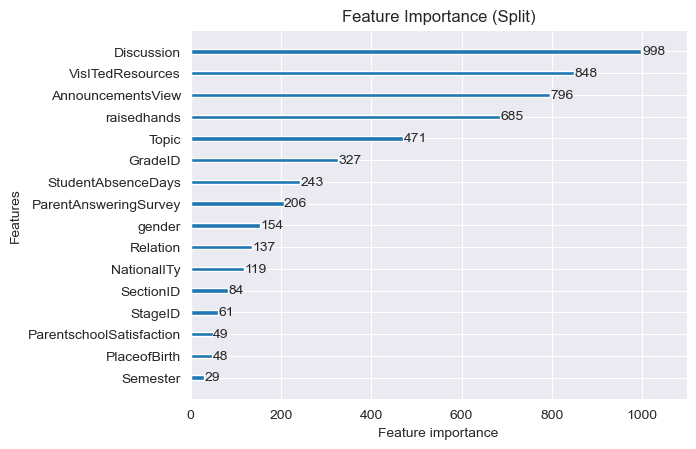

In [213]:
plot_importance(best_model, importance_type='split', title='Feature Importance (Split)')
plt.show()

### Посмотрим на ситуацию с бустингами теперь:

In [219]:
scores['LGBMTuned'] = pd.Series(accuracy_score(y_test, best_pred))

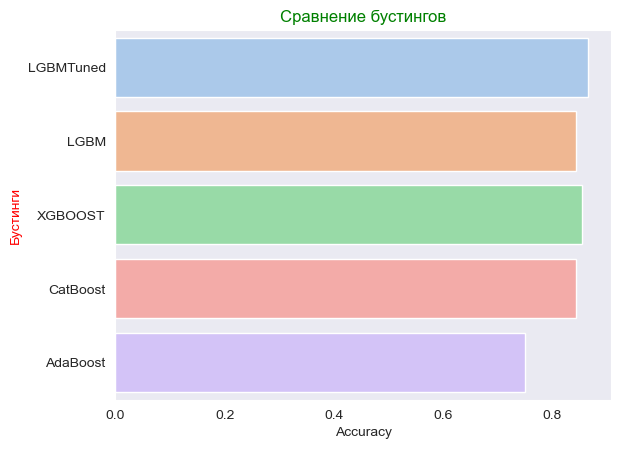

In [221]:
sns.barplot(scores[['LGBMTuned', 'LGBM', 'XGBOOST', 'CatBoost', 'AdaBoost']], orient='h', palette='pastel')
sns.set_style("dark")
plt.xlabel('Accuracy')
plt.ylabel('Бустинги', color = 'red')
plt.title('Сравнение бустингов', color = 'green')
plt.show()

#### LGBM с подобранными параметрами обгоняет другие бустинги. Если подобрать для CatBoost, то возможно score можно улучшить еще больше

### Сравнение бэггинга, стекинга и мульти-стекинга

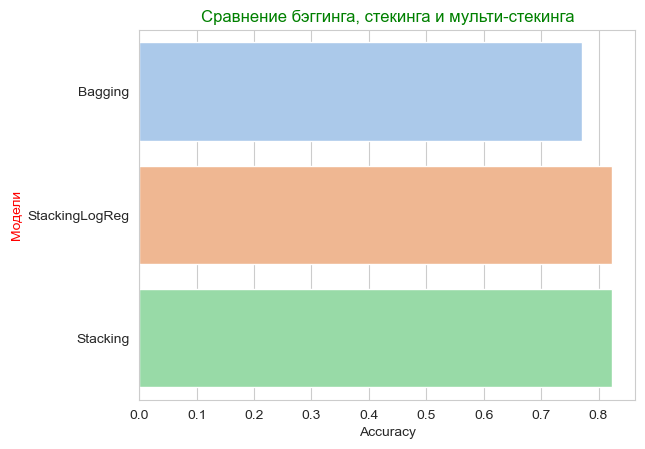

In [226]:
sns.barplot(scores[['Bagging', 'StackingLogReg', 'Stacking']], orient='h', palette='pastel')
sns.set_style("dark")
plt.xlabel('Accuracy')
plt.ylabel('Модели', color = 'red')
plt.title('Сравнение бэггинга, стекинга и мульти-стекинга', color = 'green')
plt.show()

In [227]:
scores['Stacking']

0    0.822917
Name: Stacking, dtype: float64

In [229]:
# В StackingLogReg за основу взяты:
# RF и SVM с линейным ядром. Возьмем дополнительно бустинг LGBM. Улучшится ли результат ?

m1 = RandomForestClassifier()
m2 = SVC(kernel='linear')
m3 = LGBMClassifier(verbose = -1)
estimators = [('RandomForest', m1), ('svm', m2), ('LGBM', m3)]
ensemble = VotingClassifier(estimators)
ensemble_model = ensemble.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

In [230]:
accuracy_score(y_test, ensemble_pred)

0.84375

In [232]:
#Скор улучшился. Попробуем добавить XGBoost

In [249]:
m1 = RandomForestClassifier()
m2 = SVC(kernel='linear', random_state=42)
m3 = LGBMClassifier(verbose = -1)
m4 = XGBClassifier()
estimators = [('RandomForest', m1), ('svm', m2), ('LGBM', m3), ('XGBoost', m4)]
ensemble = VotingClassifier(estimators)
ensemble_model = ensemble.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

In [250]:
accuracy_score(y_test, ensemble_pred)

0.84375

# Регрессия. Данные №2. Предсказать возраст краба


- Набор данных используется для оценки возраста краба на основе физических характеристик

- Сссылка на данные - https://clck.ru/36wxXK

## Сравним, как работают бустинги

In [276]:
submit_data = pd.read_csv('test.csv', index_col = "id")
train_data = pd.read_csv('train.csv', index_col = "id")
orig_train_data = pd.read_csv('CrabAgePrediction.csv').rename_axis("id")

In [277]:
#Предобработка
features_cols = train_data.columns[:-1]
features_to_encode = ["Sex"]
features_to_scale = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']

label_col = ["Age"]

print(features_cols,features_to_encode,features_to_scale,label_col)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object') ['Sex'] ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight'] ['Age']


In [278]:
data_full = pd.concat([train_data,orig_train_data], ignore_index=True).rename_axis("id")

In [279]:
print(train_data.shape)
print(orig_train_data.shape)
print(data_full.shape)

(74051, 9)
(3893, 9)
(77944, 9)


In [280]:
data_full = pd.concat([train_data,orig_train_data], ignore_index=True).rename_axis("id")
data_full.drop_duplicates(inplace=True)
from sklearn.preprocessing import OneHotEncoder


def oneHot(df, column):
    
    encoder = OneHotEncoder()
    encoder.fit(df[[column]])
    transformed = encoder.transform(df[[column]])

    print(encoder.categories_[0])

    df_oneHot = df.copy()
    df_oneHot[encoder.categories_[0]] = transformed.toarray()
    df_oneHot.drop(columns = column,axis = 1,inplace=True)
    
    return df_oneHot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data_full.drop(labels = label_col, axis = 1) 
y = data_full[label_col]

scaler = StandardScaler()


X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

for feature in  features_to_encode:
    X = oneHot(X,feature)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,shuffle=True)

['F' 'I' 'M']


In [281]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

In [282]:
from sklearn.metrics import mean_absolute_percentage_error

In [284]:
#Модели
XGB = XGBRegressor()
LGBM = LGBMRegressor(verbose = -1)
CAT = CatBoostRegressor(verbose = False)
ADA = AdaBoostRegressor()

#Для XGB LabelEncoding
new_y_train = encoder.fit_transform(y_train)
new_y_test = encoder.fit_transform(y_test)
XGB.fit(X_train, new_y_train)

#Обучаем
LGBM.fit(X_train, y_train)
CAT.fit(X_train, y_train)
ADA.fit(X_train, y_train)

#Предсказываем
XGB_pred = XGB.predict(X_test)
LGBM_pred= LGBM.predict(X_test)
CAT_pred = CAT.predict(X_test)
ADA_pred = ADA.predict(X_test)



C:\Users\ktota\anaconda3\anacondas\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ktota\anaconda3\anacondas\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ktota\anaconda3\anacondas\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [285]:
#Считаем метрики
bag = pd.DataFrame()
xg = pd.Series(mean_absolute_percentage_error(y_test,XGB_pred))
lg = pd.Series(mean_absolute_percentage_error(y_test,LGBM_pred))
ca = pd.Series(mean_absolute_percentage_error(y_test, CAT_pred))
ad = pd.Series(mean_absolute_percentage_error(y_test, ADA_pred))

bag['XGBoost'] = xg
bag['LGBM'] = lg
bag['CatBoost'] = ca
bag['AdaBoost'] = ad 

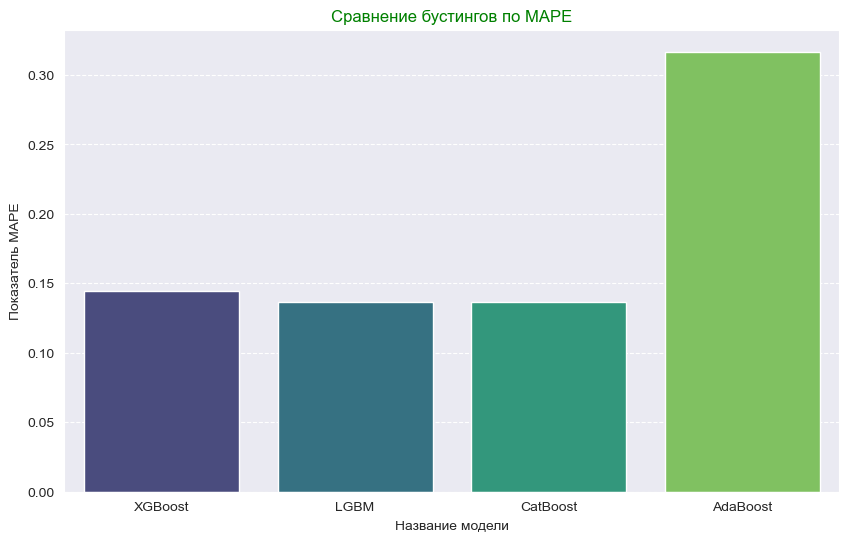

In [293]:
#Визуализируем
plt.figure(figsize=(10, 6))
sns.barplot(bag,palette='viridis')
plt.title('Сравнение бустингов по MAPE', color = 'green')
plt.xlabel('Название модели')
plt.ylabel('Показатель MAPE')
plt.grid(True, axis='y', linestyle='--', alpha=1)


In [296]:
bag

,XGBoost,LGBM,CatBoost,AdaBoost
0,0.14485,0.13676,0.136237,0.316766


In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


In [295]:
#Делаем стекинг
m1 = LGBMRegressor()
m2 = LinearRegression()
m3 = RandomForestRegressor()
estimators = [('LGBM', m1), ('LinearRegression', m2), ('RandomForest', m3)]
vote = VotingRegressor(estimators)
vote.fit(X_train, y_train)
vote_preds = vote.predict(X_test)


C:\Users\ktota\anaconda3\anacondas\Lib\site-packages\sklearn\ensemble\_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 62355, number of used features: 10
[LightGBM] [Info] Start training from score 9.964061


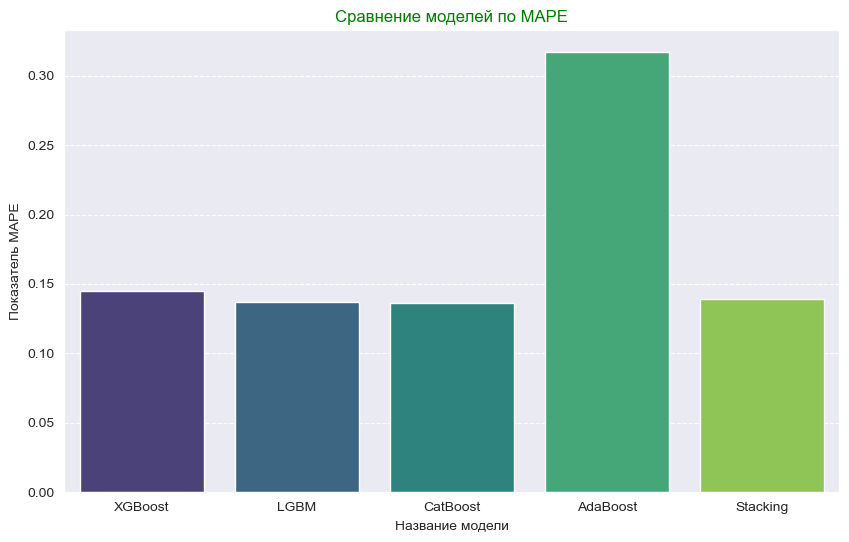

In [299]:
#Визуализируем по сравнению с бустингами
bag['Stacking'] = pd.Series(mean_absolute_percentage_error(y_test,vote_preds))
plt.figure(figsize=(10, 6))
sns.barplot(bag,palette='viridis')
plt.title('Сравнение моделей по MAPE', color = 'green')
plt.xlabel('Название модели')
plt.ylabel('Показатель MAPE')
plt.grid(True, axis='y', linestyle='--', alpha=1)

In [300]:
bag

,XGBoost,LGBM,CatBoost,AdaBoost,Stacking
0,0.14485,0.13676,0.136237,0.316766,0.138944


In [302]:
from sklearn.ensemble import StackingRegressor

In [303]:
#Делаем многоуровневый стекинг (Добавим на выход линейную регрессию)
m1 = LGBMRegressor()
m2 = CatBoostRegressor()
m3 = XGBRegressor()

estimators = [('LGBM', m1), ('CatBoost', m2), ('XGBoost', m3)]
vote = StackingRegressor(estimators, final_estimator=LinearRegression(),
    n_jobs=-1,
    cv=5)
vote.fit(X_train, y_train)
multistack = vote.predict(X_test)

C:\Users\ktota\anaconda3\anacondas\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [304]:
#Сравним по MAPE
bag['Multi-stacking'] = pd.Series(mean_absolute_percentage_error(y_test, multistack))

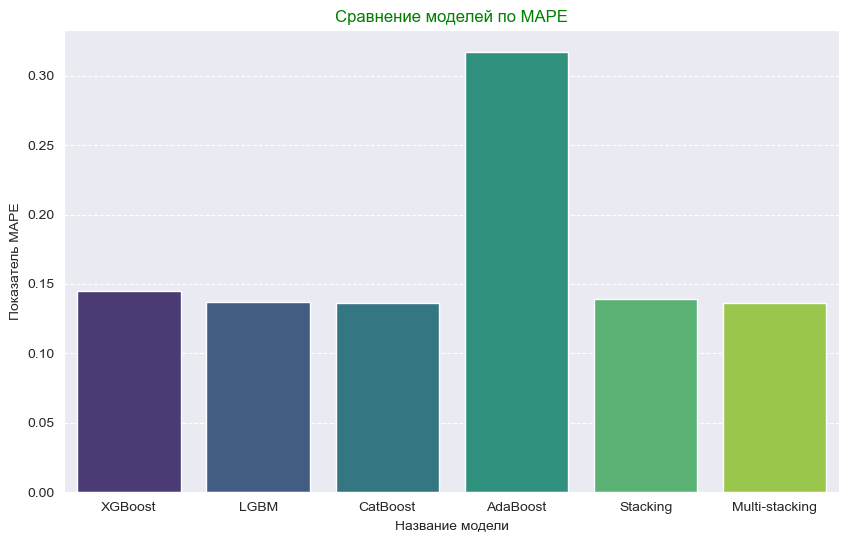

In [306]:
plt.figure(figsize=(10, 6))
sns.barplot(bag,palette='viridis')
plt.title('Сравнение моделей по MAPE', color = 'green')
plt.xlabel('Название модели')
plt.ylabel('Показатель MAPE')
plt.grid(True, axis='y', linestyle='--', alpha=1)

In [307]:
bag

,XGBoost,LGBM,CatBoost,AdaBoost,Stacking,Multi-stacking
0,0.14485,0.13676,0.136237,0.316766,0.138944,0.136053


## Мульти-стакинг показывает самый лучший результат